# CNN (Convolutional Neural Network)

## - MNIST [[See the Result First](#visualized)]

#### (0) Define Hyper-parameters / Helper Function

In [1]:
import torch

In [2]:
# Device Configuration for Where the Tensors Be Operated
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Adjust Model Structure Depends on the Data
num_classes = 10
in_channel = 1

# Hyper-parameters
batch_size = 1
shuffle = False
max_pool_kernel = 2
learning_rate = 0.001
num_epochs = 5

#### (1) Load Data

In [3]:
import torchvision # To Download MNIST Datasets from Torch 
import torchvision.transforms as transforms # To Transform MNIST "Images" to "Tensor"

In [4]:
train_data = torchvision.datasets.MNIST(root='./datasets',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

test_data = torchvision.datasets.MNIST(root='./datasets',
                                       train=False,
                                       transform=transforms.ToTensor())

#### (2) Define Dataloader

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=shuffle)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

In [6]:
# cf) check how data_loader works
image, label = next(iter(train_loader))
print(image.size(), ": [Batch, Channel, Height, Width] Respectively")

torch.Size([1, 1, 28, 28]) : [Batch, Channel, Height, Width] Respectively


#### (3) Define Model

In [7]:
import torch.nn as nn

In [8]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
                nn.Conv2d(in_channel, 16, 5, stride=1, padding=2),
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.MaxPool2d(max_pool_kernel))
        self.layer2 = nn.Sequential(
                nn.Conv2d(16, 32, 5, stride=1, padding=2),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(max_pool_kernel))
        self.fc1 = nn.Linear(7*7*32, 120)
        self.fc2 = nn.Linear(120, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

#class ConvNet(nn.Module):
#    def __init__(self, num_classes=10):
#        super(ConvNet, self).__init__()
#        self.layer1 = nn.Sequential(
#                nn.Conv2d(in_channel, 16, 5, stride=1, padding=2),
#                nn.BatchNorm2d(16),
#                nn.ReLU(),
#                nn.MaxPool2d(max_pool_kernel))
#        self.fc1 = nn.Linear(14*14*16, num_classes)
#
#    def forward(self, x):
#        x = self.layer1(x)
#        x = x.reshape(x.size(0), -1)
#        x = self.fc1(x)
#        return x

model = ConvNet(num_classes).to(device) # Copy All Tensors to GPU (if possible)

#### (4) Set Loss & Optimizer

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### (5) Train / Test

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Assign Tensors to Configured Device
        images = images.to(device)
        labels = labels.to(device)

        # Forward Propagation
        outputs = model(images)

        # Get Loss, Compute Gradient, Update Parameters
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print Loss for Tracking Training
        if (i+1) % 1000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            test_image, test_label = next(iter(test_loader))
            _, test_predicted = torch.max(model(test_image.to(device)).data, 1)
            print('Testing data: [Predicted: {} / Real: {}]'.format(test_predicted, test_label))

    if epoch+1 == num_epochs:
        torch.save(model.state_dict(), 'model.pth')
    else:
        torch.save(model.state_dict(), 'model-{:02d}_epochs.pth'.format(epoch+1))

# Test after Training is done
model.eval() # Set model to Evaluation Mode (Batchnorm uses moving mean/var instead of mini-batch mean/var)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the {} test images: {} %'.format(len(test_loader)*batch_size, 100 * correct / total))

<h2 id='visualized'> cf) Process in Visualization </h3>

<img src="../../shared/CNN_MNIST_process.png" alt="Drawing" style="width: 800px;" align="left"/>

#### (0) Prepare for Visualization

In [10]:
# cf) Check How the Data is Formed
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
# For Displaying Inline Style (Only for .ipynb fileformat)
%matplotlib inline 

visual_loader = torch.utils.data.DataLoader(dataset=train_data,
                                            batch_size=2,
                                            shuffle=shuffle)

class ConvNetBreakDown(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNetBreakDown, self).__init__()
        self.layer1 = nn.Sequential(
                nn.Conv2d(in_channel, 16, 5, stride=1, padding=2),
                nn.BatchNorm2d(16),
                nn.ReLU(),
                nn.MaxPool2d(max_pool_kernel))
        self.layer2 = nn.Sequential(
                nn.Conv2d(16, 32, 5, stride=1, padding=2),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(max_pool_kernel))
        self.fc1 = nn.Linear(7*7*32, 120)
        self.fc2 = nn.Linear(120, num_classes)

    def forward1(self, x):
        x = self.layer1(x)
        return x
    
    def forward2(self, x):
        x = self.layer2(x)
        return x
    
    def forward3(self, x):
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    def forward4(self, x):
        x = self.fc2(x)
        return x

model1 = ConvNetBreakDown()

def image_show(one_image_tensor):
    image = one_image_tensor.reshape(one_image_tensor.size()[1], one_image_tensor.size()[2])
    imshow(image, cmap='gray')

images, _ = next(iter(visual_loader))
image1 = images[0]
image2 = images[1]

#### (1) Row MNIST Image Data

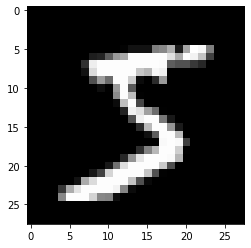

In [11]:
image_show(image1)

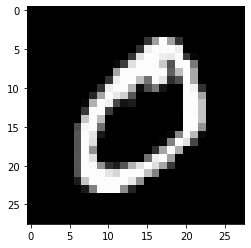

In [12]:
image_show(image2)

#### (2) After CNN1 

In [13]:

# output1 = model1(images)
output1 = model1.forward1(images)
print(output1.size())

image1 = torch.zeros(14,14)
image2 = torch.zeros(14,14)
for i in range(output1.size()[1]):
    image1 += output1[0][i].reshape(14,14)
    image2 += output1[1][i].reshape(14,14)
    
image1 = image1.detach().numpy()
image2 = image2.detach().numpy()

# show_n_images(1, 2, [temp, temp2])

torch.Size([2, 16, 14, 14])


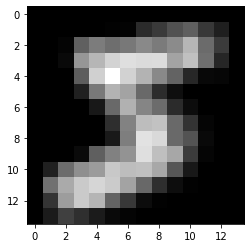

In [14]:
imshow(image1, cmap='gray')

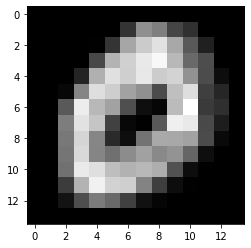

In [15]:
imshow(image2, cmap='gray')

#### (3) After CNN2

In [16]:
output2 = model1.forward2(output1)
print(output2.size())
image1 = torch.zeros(7,7)
image2 = torch.zeros(7,7)
for i in range(output2.size()[1]):
    image1 += output2[0][i].reshape(7,7)
    image2 += output2[1][i].reshape(7,7)
    
image1 = image1.detach().numpy()
image2 = image2.detach().numpy()

torch.Size([2, 32, 7, 7])


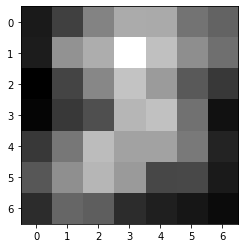

In [17]:
imshow(image1, cmap='gray')

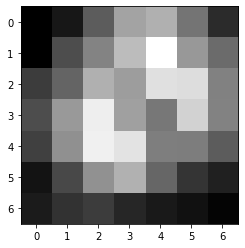

In [18]:
imshow(image2, cmap='gray')

#### (4) After Affine (Fully Connected) Layer

In [19]:
output3 = model1.forward3(output2)
print(output3.size())
image1 = output3[0]
image2 = output3[1]
    
image1 = image1.detach().numpy()
image2 = image2.detach().numpy()

output4 = model1.forward4(output3)
print(output4.size())
image1_final = output4[0]
image2_final = output4[1]
    
image1_final = image1_final.detach().numpy()
image2_final = image2_final.detach().numpy()

torch.Size([2, 120])
torch.Size([2, 10])


In [20]:
print(image1)
print("--------------------------------------------------------------------------")
print(image1_final)
print("--------------------------------------------------------------------------")
print(list(image1_final).index(image1_final.max()))

[-0.12028497 -1.0985287   0.4850386  -0.728275    1.2114327   0.6253091
  0.44055012 -0.13699892  0.39214814  0.84104216  0.8575424  -1.5009484
  1.8392613   0.04489582  0.7690231   0.06300145  0.44038886  0.3149195
 -0.14711145 -0.3428159  -0.6596799   1.2041519  -0.64836204  0.44204956
 -1.0003519  -1.1528697  -0.23321263 -0.35875556  0.31533852  0.23203489
  0.04689763 -0.27674186  0.12963687  0.4106165   0.24743658 -0.33677253
  0.40609843  0.5481664  -0.4621819  -0.19970709  1.3267375   0.522119
 -0.8283643   0.08727041 -0.78836304  0.97165513 -0.84709245  0.5733197
 -0.49175176 -0.58251107 -0.2812832  -1.3301613  -0.14121164 -0.10186651
  0.6415606  -0.48582208 -0.5331739  -0.39114884 -0.27465406 -0.9931074
 -0.93980455 -0.8516038   0.27708876  1.5435843  -0.25806853 -0.39325136
 -0.30420864 -0.7513258  -0.0341926   0.87174517  0.4729074  -0.26518688
 -0.549304    0.21443397  0.25508258  0.89327776  0.48445842  0.8846024
 -0.02477154  0.47946563  0.8574825  -0.04841282  0.3401843

In [21]:
print(image2)
print("--------------------------------------------------------------------------")
print(image2_final)
print("--------------------------------------------------------------------------")
print(list(image2_final).index(image2_final.max()))

[ 0.27697155 -0.89009744  0.21073903 -0.6986475   1.2725148   0.85685205
 -0.25423    -0.30670643 -0.7318788   0.9729396   1.1517552  -0.47549048
  0.88385355  0.3100457   1.0154263  -0.3556156   0.23670219  0.338034
  0.46064958 -0.40188047 -0.54538363  1.6852645  -0.41062674  0.3301832
 -0.69334996 -0.56228906 -0.26300347  0.156826    0.69236475 -0.8518896
  0.23722425  0.6298126   0.8281198   0.95820785 -0.23028998  0.32788485
  0.11015481  1.0658542  -0.47614995  0.71779984  1.0419674   0.4362652
 -0.0773547   0.18452701 -0.687871    0.8819567  -1.0103335  -0.2912719
 -0.17078698 -1.1520836  -0.47803688 -0.2688221   1.0838035  -0.24245948
  0.8436424  -0.6032392  -0.4298684  -0.77947086 -0.06708682 -0.58575416
 -1.2106805  -1.2226864   0.8818613   0.9467422   0.00869486 -0.9626736
  0.46140364 -0.292957   -1.0638226   1.7632109   0.60199213 -0.33141425
  0.23110309  0.33741    -0.26231036  0.44024175  0.14430264  0.16507037
 -0.24985161 -0.3388356   1.0237356  -0.25636685  0.370109

#### cf) MNIST Distribution

<img src="../../shared/MNIST_sample.png" alt="Drawing" style="width: 500px;" align="left"/>